In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

9.351313911865049 41.39579326322516
8.702310054645807 -12.079118686334638
73.71900328982426 -12.196969729074041
-37.56567549202245 -29.443361393891557
56.23062260268 77.44418945300944
-18.01330249071742 -86.33310448040032
-52.76921810595659 -74.63172155068044
24.367439231887445 -52.17740151304766
-31.722483376363456 85.0568810946985
83.33992678908086 72.06612342813196
-76.86725194167072 81.75243920639357
88.40560061052196 -45.08861210771148
15.26298862211354 -59.501791423998455
-3.9840294431116234 54.47846001589775
-33.82144861765139 63.66305178759251
65.43525000496885 -34.614980701729806
-52.457997214238254 -39.010797540168376
-60.04286155047896 -55.73693347697243
42.65115854732366 8.558885193147617
11.060465744084539 35.65034693746439
22.236316553043665 -3.0025551350074835
13.719578507443174 61.91007804710435
-74.0741785506086 -6.9135719535421885
-81.54305905202332 -9.839027380697601
59.475722122536325 63.04030321204618
30.148783373398715 36.08067676373305
-74.99441182066312 53.26624

71.11589468300662 51.907344974845955
86.34937442453054 48.0483496958818
36.00768504564087 62.776571158966334
79.9692756567035 56.059229120858106
-11.577609947236326 72.57061654353376
-62.587759011443744 5.723824681018954
-33.104096129724624 -66.16736963932021
82.26006750450426 -22.73216359007911
60.15374666323524 85.01261432657202
87.65234498076771 -2.4646641881043507
-42.6870892254815 42.05134752797474
35.15904326356835 49.658378612382336
54.968691983239694 -69.81085090127661
-47.98391687609578 -38.67292283328308
62.066039481408524 -63.260961322829544
-15.596460311713145 -88.4594627644154
3.121559076400331 -20.52495578555444
56.28105637708953 10.348595102314917
77.72739497562245 59.85700859351749
15.678914532938848 10.096488469426347
6.949214664132157 16.320813612522556
-65.64224183773447 62.13886571743333
-25.41030891338947 19.436410512516687
-48.207568938493544 -59.609400626748894
-11.932116556225722 -6.097560945955479
45.575427078963855 -21.44233458756044
58.05266793657347 -0.80973

In [7]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then add it to the list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

625

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key
# city = "Boston"
# query_url = url + "&q=" + city
# print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=becb6201b0a3f8f62d0a7a574b4d4b2d&q=Boston


In [8]:
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [9]:
# weather_json.keys()

In [10]:
# Make a 'Get' request for the city weather
# city_weather = requests.get(query_url)
# city_weather

In [11]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count+=1
# Run the API request for each of the cities
    try:
        # Parse the json and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
    # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | labytnangi
Processing Record 3 of Set 1 | rio gallegos
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | iquitos
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | mana
Processing Record 11 of Set 1 | auchi
Processing Record 12 of Set 1 | cockburn town
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | bajil
Processing Record 15 of Set 1 | bayburt
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | mont-de-marsan
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | ca

Processing Record 39 of Set 4 | birjand
Processing Record 40 of Set 4 | puerto baquerizo moreno
Processing Record 41 of Set 4 | henties bay
Processing Record 42 of Set 4 | muromtsevo
Processing Record 43 of Set 4 | bababe
City not found. Skipping...
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | somerset west
Processing Record 48 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | dovolnoye
Processing Record 1 of Set 5 | banda aceh
Processing Record 2 of Set 5 | casma
Processing Record 3 of Set 5 | shubarshi
Processing Record 4 of Set 5 | maykor
Processing Record 5 of Set 5 | ariquemes
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | agapovka
Processing Record 9 of Set 5 | karaul
City not found. Skipping...
P

Processing Record 31 of Set 8 | sao felix do xingu
Processing Record 32 of Set 8 | barcelos
Processing Record 33 of Set 8 | zastron
Processing Record 34 of Set 8 | muzhi
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | san ignacio
Processing Record 38 of Set 8 | mlada vozice
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | okoneshnikovo
Processing Record 41 of Set 8 | tanout
Processing Record 42 of Set 8 | buraydah
Processing Record 43 of Set 8 | raga
Processing Record 44 of Set 8 | sfantu gheorghe
Processing Record 45 of Set 8 | keskin
Processing Record 46 of Set 8 | porto murtinho
Processing Record 47 of Set 8 | sinkat
City not found. Skipping...
Processing Record 48 of Set 8 | timra
Processing Record 49 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 50 of Set 8 | itarema
Processing Record 1 of Set 9 | kapoeta
Processing Record 2 of Set 9 | eydhafushi
Processing Record 3 of 

Processing Record 23 of Set 12 | harper
Processing Record 24 of Set 12 | putina
Processing Record 25 of Set 12 | yantzaza
Processing Record 26 of Set 12 | ippy
Processing Record 27 of Set 12 | manzil salim
Processing Record 28 of Set 12 | coruripe
Processing Record 29 of Set 12 | mangan
Processing Record 30 of Set 12 | vannes
Processing Record 31 of Set 12 | kurchum
Processing Record 32 of Set 12 | araripe
Processing Record 33 of Set 12 | rafsanjan
Processing Record 34 of Set 12 | antoing
Processing Record 35 of Set 12 | astana
Processing Record 36 of Set 12 | riyadh
Processing Record 37 of Set 12 | manavalakurichi
Processing Record 38 of Set 12 | tiznit
Processing Record 39 of Set 12 | sauda
Processing Record 40 of Set 12 | boca do acre
Processing Record 41 of Set 12 | muros
Processing Record 42 of Set 12 | oksfjord
Processing Record 43 of Set 12 | thinadhoo
Processing Record 44 of Set 12 | trelew
Processing Record 45 of Set 12 | camapua
Processing Record 46 of Set 12 | longlac
City n

In [12]:
len(city_data)

591

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-6.33,85,14,2.12,GL,2022-10-02 02:09:22
1,Labytnangi,66.6572,66.4183,-0.03,90,100,3.58,RU,2022-10-02 02:13:51
2,Rio Gallegos,-51.6226,-69.2181,5.25,56,0,3.59,AR,2022-10-02 02:12:09
3,Touros,-5.1989,-35.4608,24.73,81,12,7.17,BR,2022-10-02 02:12:17
4,Busselton,-33.6500,115.3333,13.93,68,100,7.37,AU,2022-10-02 02:13:52


In [14]:
# Re-order the columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-10-02 02:09:22,72.7868,-56.1549,-6.33,85,14,2.12
1,Labytnangi,RU,2022-10-02 02:13:51,66.6572,66.4183,-0.03,90,100,3.58
2,Rio Gallegos,AR,2022-10-02 02:12:09,-51.6226,-69.2181,5.25,56,0,3.59
3,Touros,BR,2022-10-02 02:12:17,-5.1989,-35.4608,24.73,81,12,7.17
4,Busselton,AU,2022-10-02 02:13:52,-33.6500,115.3333,13.93,68,100,7.37


In [15]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

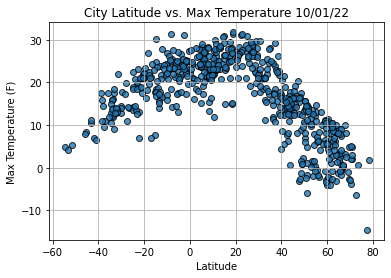

In [17]:
# Import time module
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1,marker='o',
           alpha=0.8,label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig1.png')
#Shot plot
plt.show()

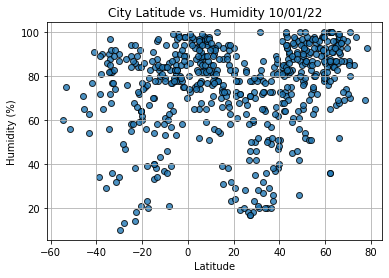

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

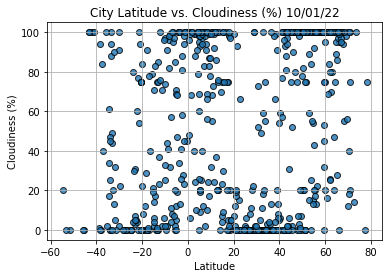

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

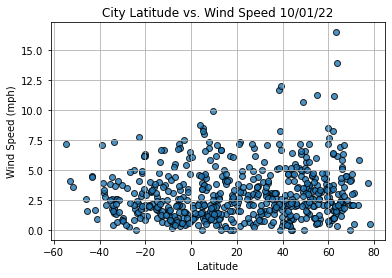

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

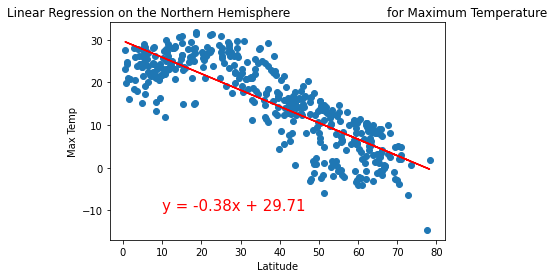

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-10))

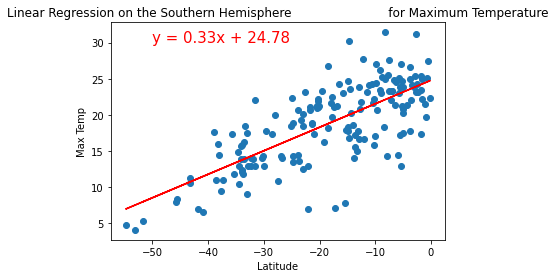

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,30))

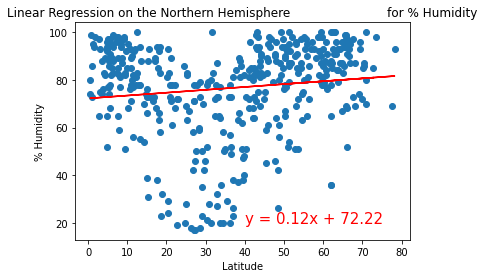

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

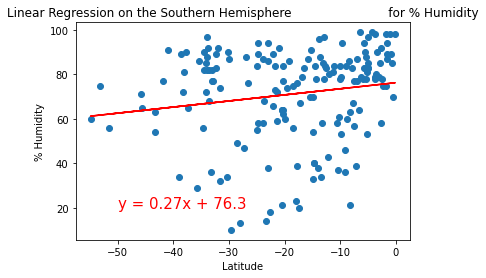

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

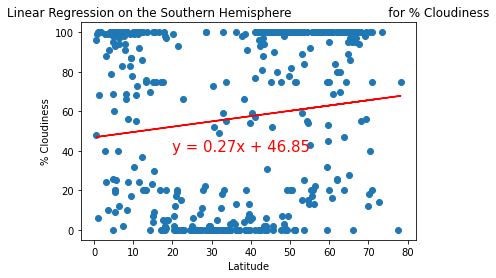

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,40))

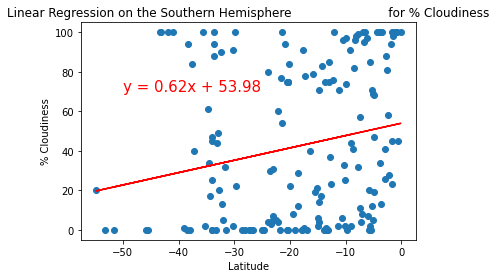

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,70))

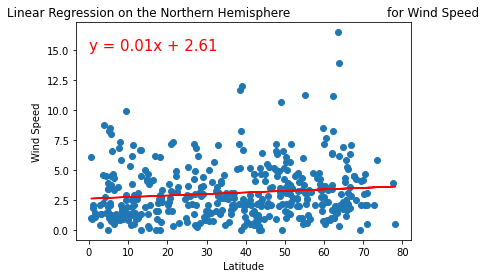

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,15))

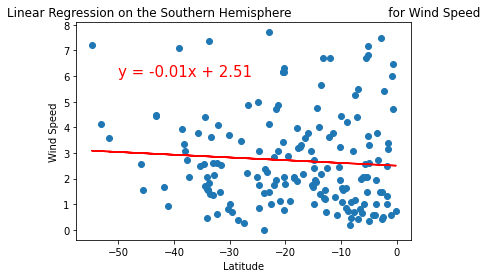

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,6))